In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshx27/which-resume-attributes-drive-job-callbacks")

print("Path to dataset files:", path)

Path to dataset files: /Users/fruit/.cache/kagglehub/datasets/utkarshx27/which-resume-attributes-drive-job-callbacks/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("resume.csv")

In [4]:
#shape of df
print(df.shape[0], 'rows')
print(df.shape[1], 'columns')
print()

#head
print(df.head())

4870 rows
30 columns

   job_ad_id job_city   job_industry    job_type  job_fed_contractor  \
0        384  Chicago  manufacturing  supervisor                 NaN   
1        384  Chicago  manufacturing  supervisor                 NaN   
2        384  Chicago  manufacturing  supervisor                 NaN   
3        384  Chicago  manufacturing  supervisor                 NaN   
4        385  Chicago  other_service   secretary                 0.0   

   job_equal_opp_employer job_ownership  job_req_any  job_req_communication  \
0                       1       unknown            1                      0   
1                       1       unknown            1                      0   
2                       1       unknown            1                      0   
3                       1       unknown            1                      0   
4                       1     nonprofit            1                      0   

   job_req_education  ... honors  worked_during_school  years_experien

In [5]:
#column type
print(df.dtypes)
print()

job_ad_id                   int64
job_city                   object
job_industry               object
job_type                   object
job_fed_contractor        float64
job_equal_opp_employer      int64
job_ownership              object
job_req_any                 int64
job_req_communication       int64
job_req_education           int64
job_req_min_experience     object
job_req_computer            int64
job_req_organization        int64
job_req_school             object
received_callback           int64
firstname                  object
race                       object
gender                     object
years_college               int64
college_degree              int64
honors                      int64
worked_during_school        int64
years_experience            int64
computer_skills             int64
special_skills              int64
volunteer                   int64
military                    int64
employment_holes            int64
has_email_address           int64
resume_quality

In [6]:
#missing values
placeholders = ['unknown', 'UNK', 'Unknown']
missing_values = df.isnull() | df.isin(placeholders)
missing_count = missing_values.sum()
print(missing_count)

job_ad_id                    0
job_city                     0
job_industry                 0
job_type                     0
job_fed_contractor        1768
job_equal_opp_employer       0
job_ownership             1992
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience    2746
job_req_computer             0
job_req_organization         0
job_req_school               0
received_callback            0
firstname                    0
race                         0
gender                       0
years_college                0
college_degree               0
honors                       0
worked_during_school         0
years_experience             0
computer_skills              0
special_skills               0
volunteer                    0
military                     0
employment_holes             0
has_email_address            0
resume_quality               0
dtype: int64


In [7]:
#check target variable
print(df['received_callback'].describe)
print('Target variable Music Effects is categorical')
print()

<bound method NDFrame.describe of 0       0
1       0
2       0
3       0
4       0
       ..
4865    0
4866    0
4867    0
4868    0
4869    0
Name: received_callback, Length: 4870, dtype: int64>
Target variable Music Effects is categorical



In [8]:
df.describe()

,job_ad_id,job_fed_contractor,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
count,4870.000000,3102.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,651.777823,0.114765,0.291170,0.787269,0.124846,0.106776,0.437166,0.072690,0.080493,3.618480,0.719507,0.052772,0.559548,7.842916,0.820534,0.328747,0.411499,0.097125,0.448049,0.479261
std,388.690698,0.318789,0.454349,0.409281,0.330578,0.308860,0.496087,0.259654,0.272083,0.714997,0.449286,0.223601,0.496492,5.044612,0.383782,0.469806,0.492156,0.296159,0.497345,0.499621
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,306.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,647.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,979.750000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns

Index(['job_ad_id', 'job_city', 'job_industry', 'job_type',
       'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
       'job_req_any', 'job_req_communication', 'job_req_education',
       'job_req_min_experience', 'job_req_computer', 'job_req_organization',
       'job_req_school', 'received_callback', 'firstname', 'race', 'gender',
       'years_college', 'college_degree', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'special_skills', 'volunteer',
       'military', 'employment_holes', 'has_email_address', 'resume_quality'],
      dtype='object')

In [10]:
#sns.pairplot(df, hue = "received_callback")
#plt.show()

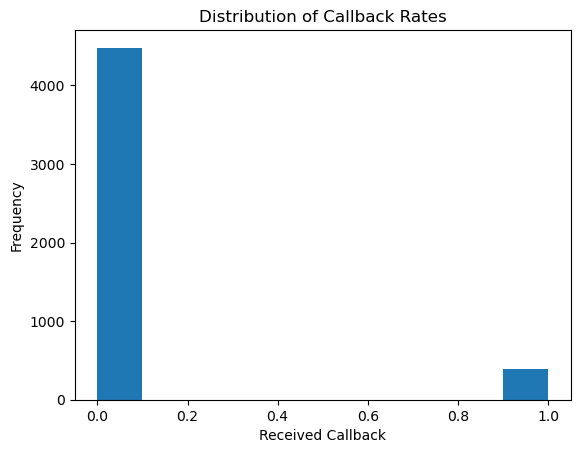

In [11]:
# Plot a histogram of callback rates

plt.hist(df["received_callback"])
plt.xlabel("Received Callback")
plt.ylabel("Frequency")
plt.title("Distribution of Callback Rates")
plt.show()

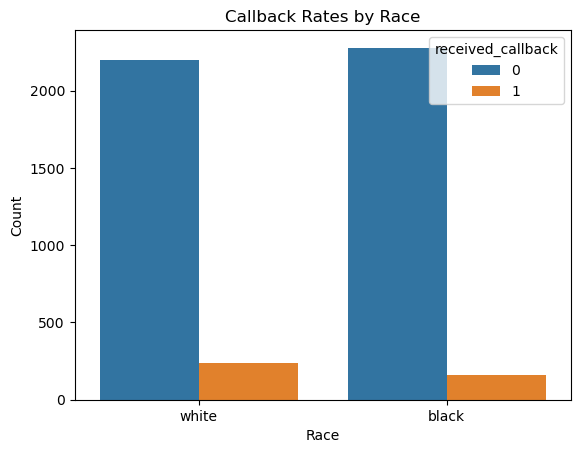

In [12]:
sns.countplot(x="race", hue="received_callback", data=df)
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Callback Rates by Race")
plt.show()

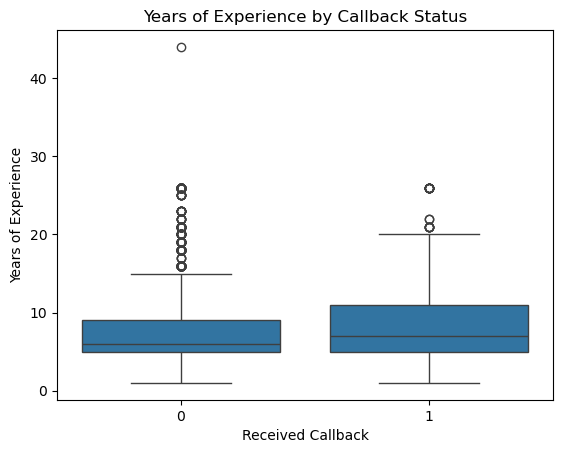

In [13]:
sns.boxplot(x="received_callback", y="years_experience", data=df)
plt.xlabel("Received Callback")
plt.ylabel("Years of Experience")
plt.title("Years of Experience by Callback Status")
plt.show()

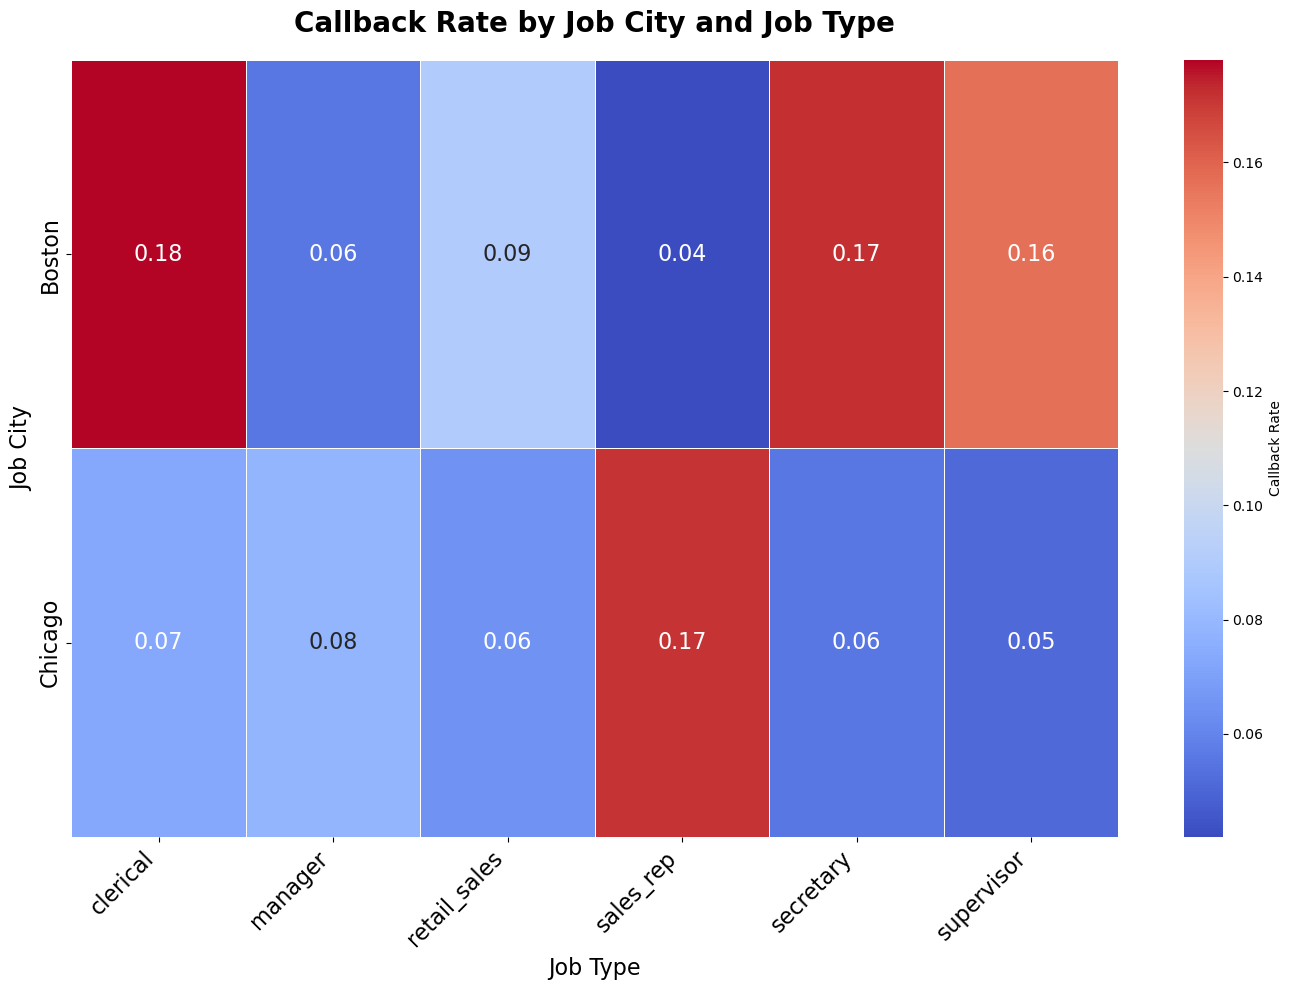

In [14]:
heatmap_data = df.pivot_table(index='job_city', columns='job_type', values='received_callback', aggfunc='mean')

# Plotting the heatmap with an improved design
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Callback Rate'}, annot_kws={"size": 16})
plt.title('Callback Rate by Job City and Job Type', fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Job Type", fontsize=16)
plt.ylabel("Job City", fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/3909797406.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='years_college', y='received_callback', data=df, ci=None, palette='viridis')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/3909797406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='years_college', y='received_callback', data=df, ci=None, palette='viridis')


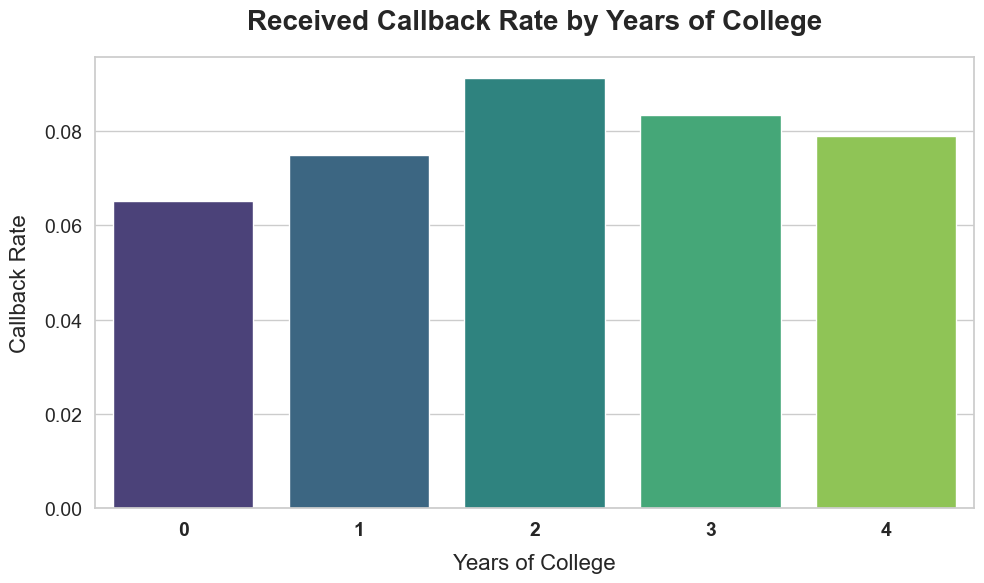

In [15]:
# Barplot for Received Callback Rate by Years of College
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the barplot
sns.barplot(x='years_college', y='received_callback', data=df, ci=None, palette='viridis')

# Customizing the plot
plt.title('Received Callback Rate by Years of College', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Years of College', fontsize=16, labelpad=10)
plt.ylabel('Callback Rate', fontsize=16, labelpad=10)
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


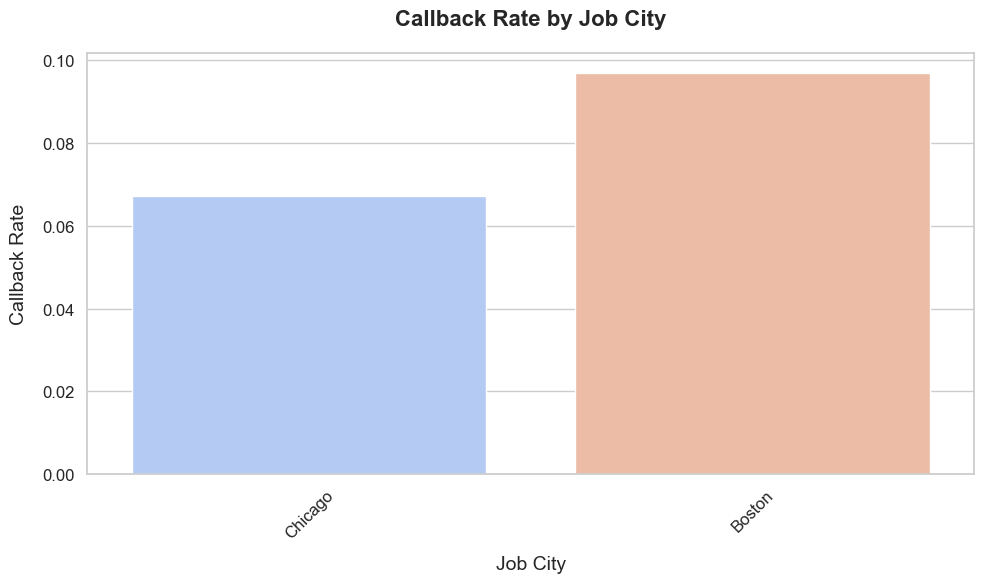

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


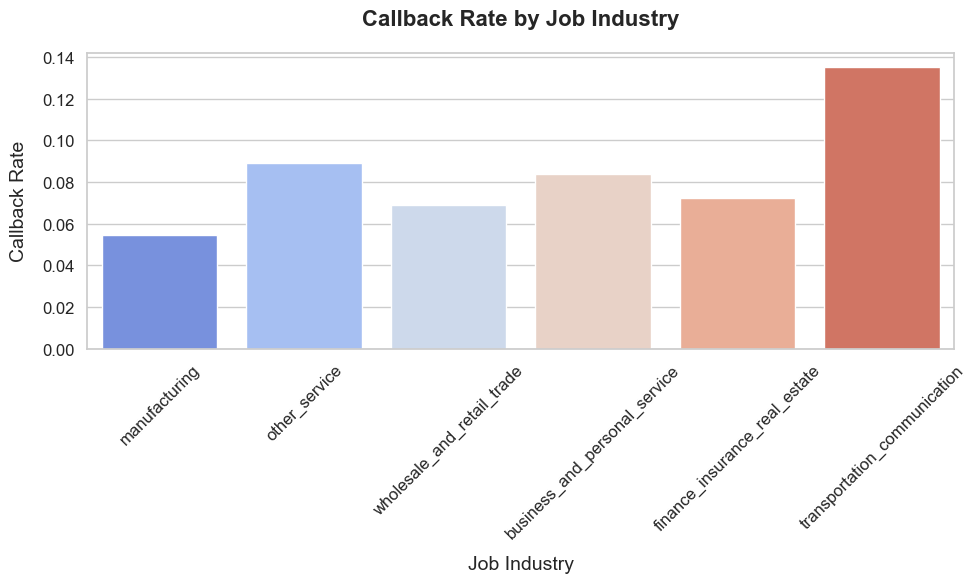

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


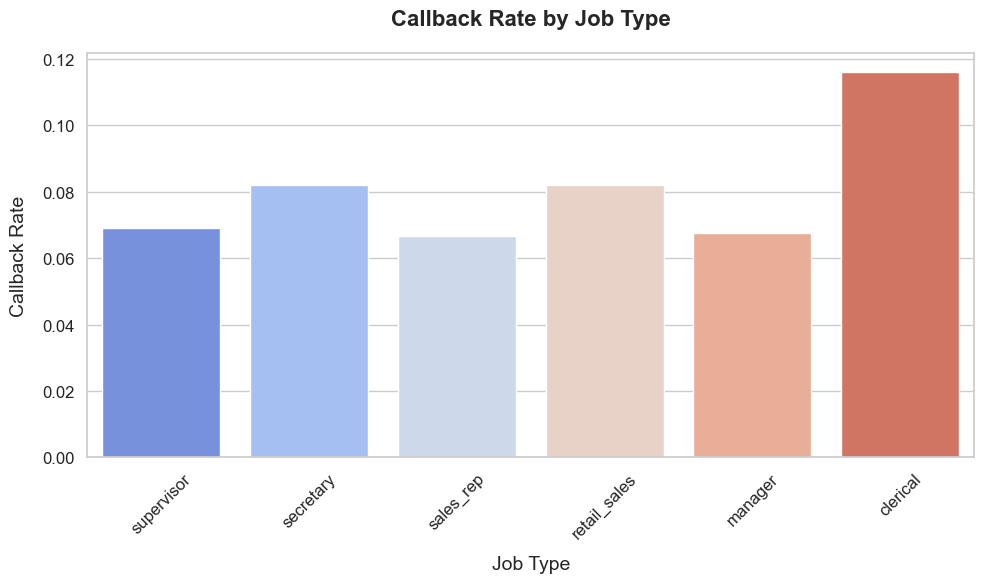

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


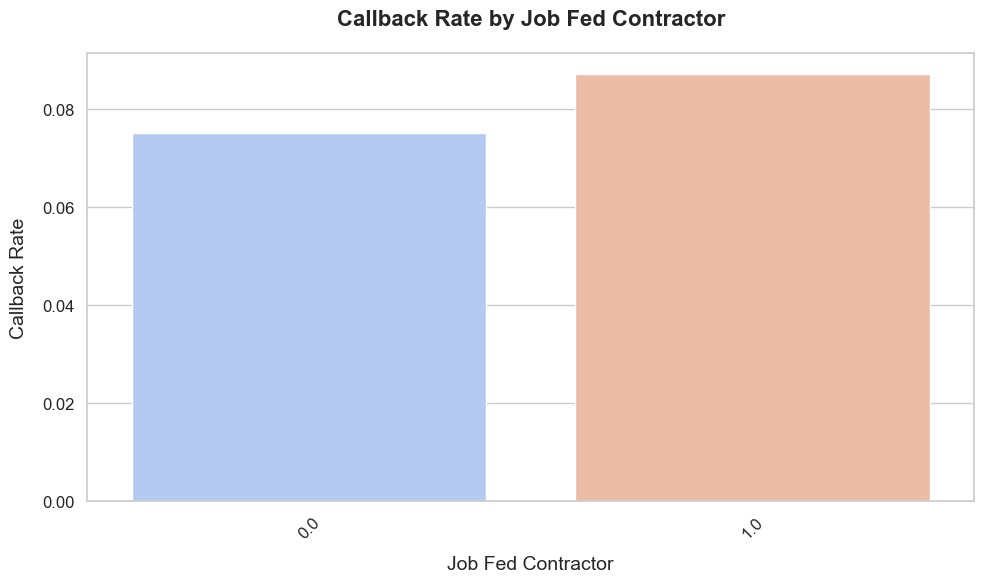

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


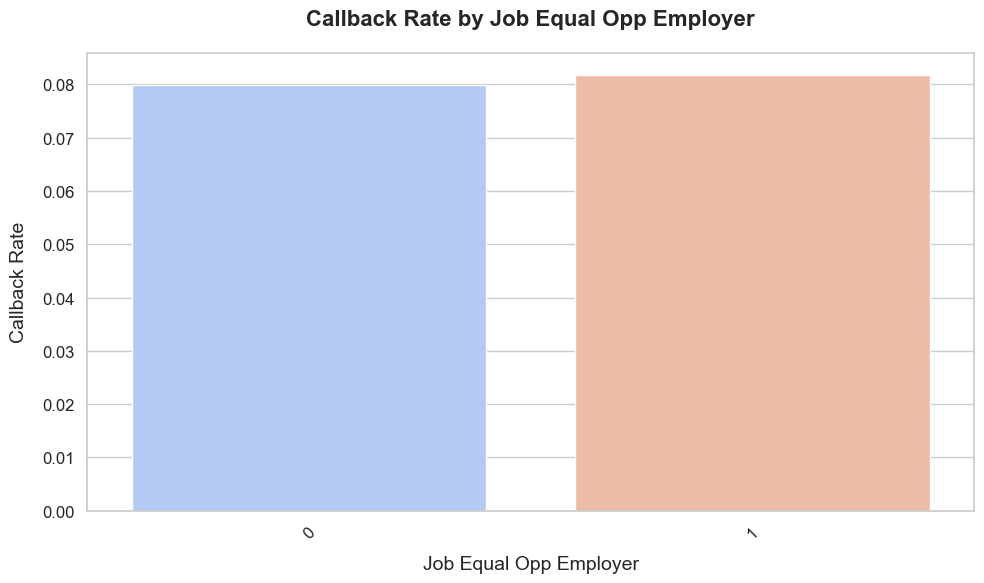

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


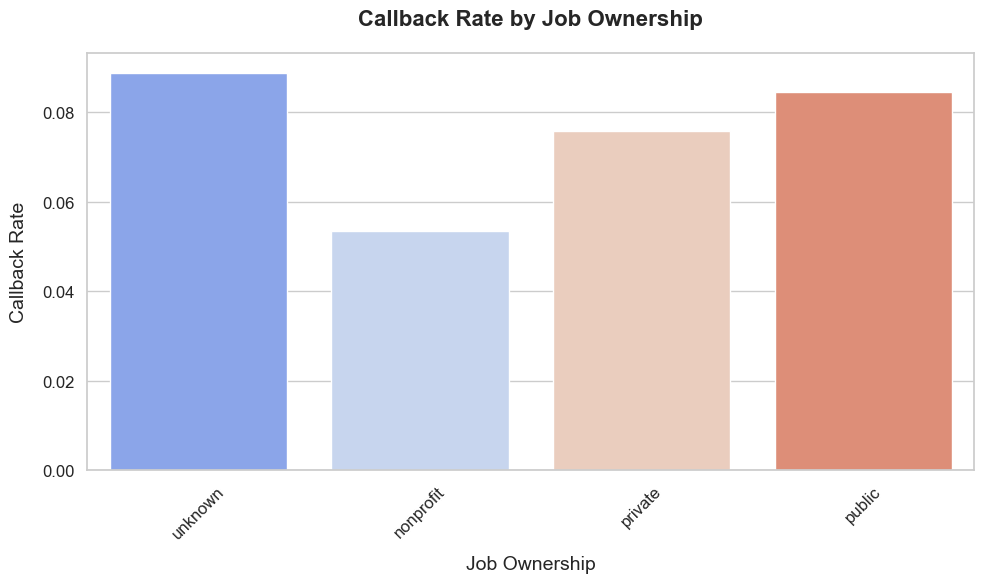

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


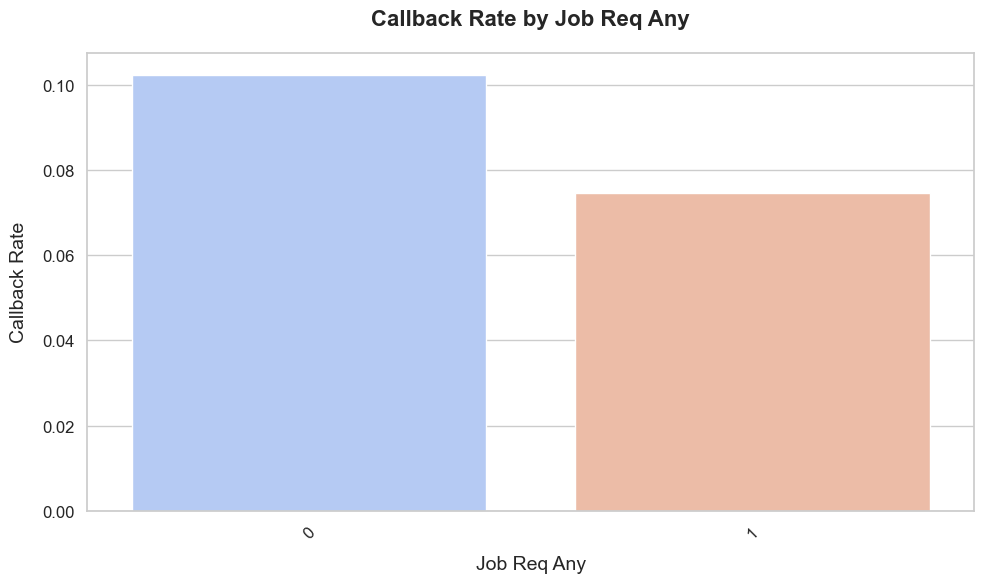

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


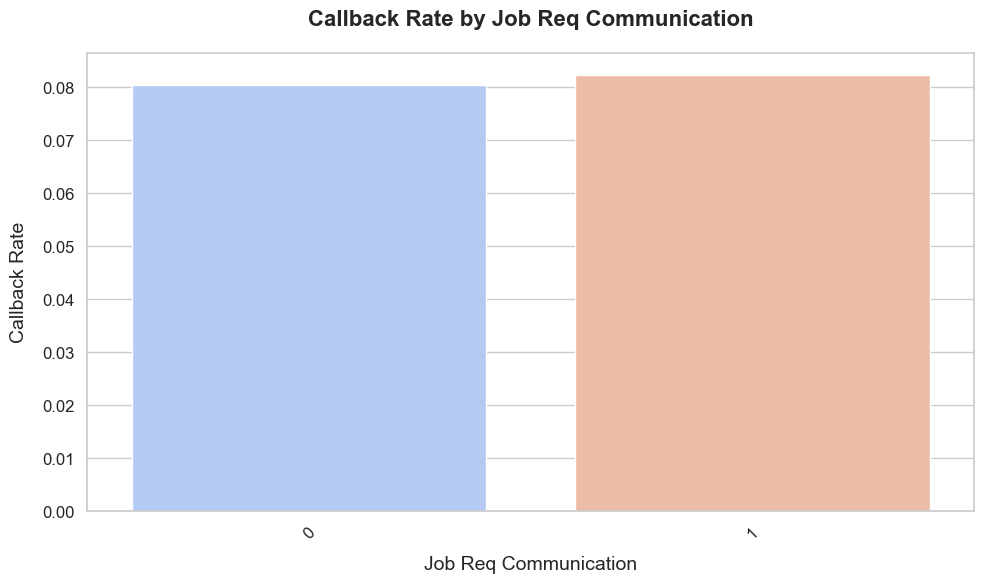

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


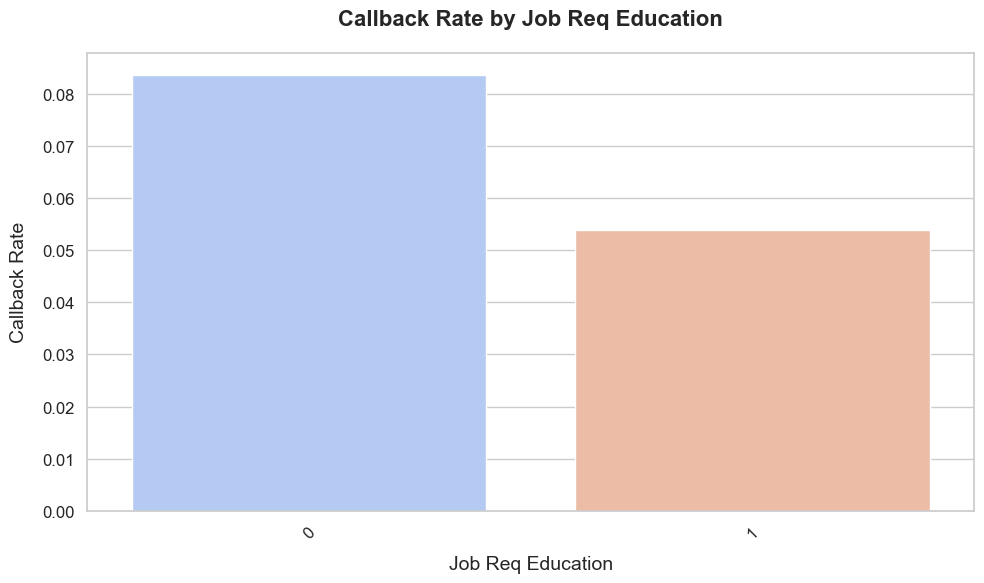

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


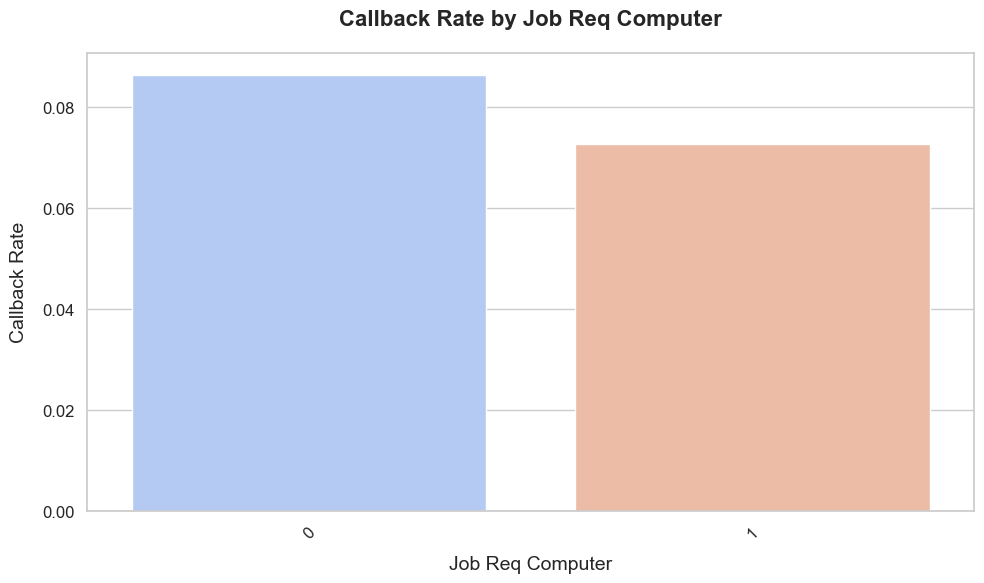

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


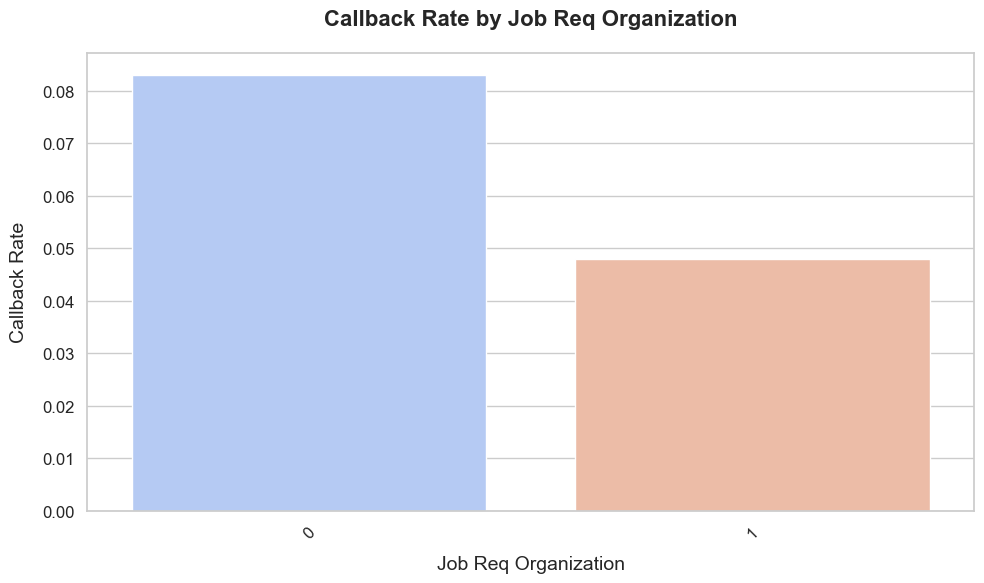

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


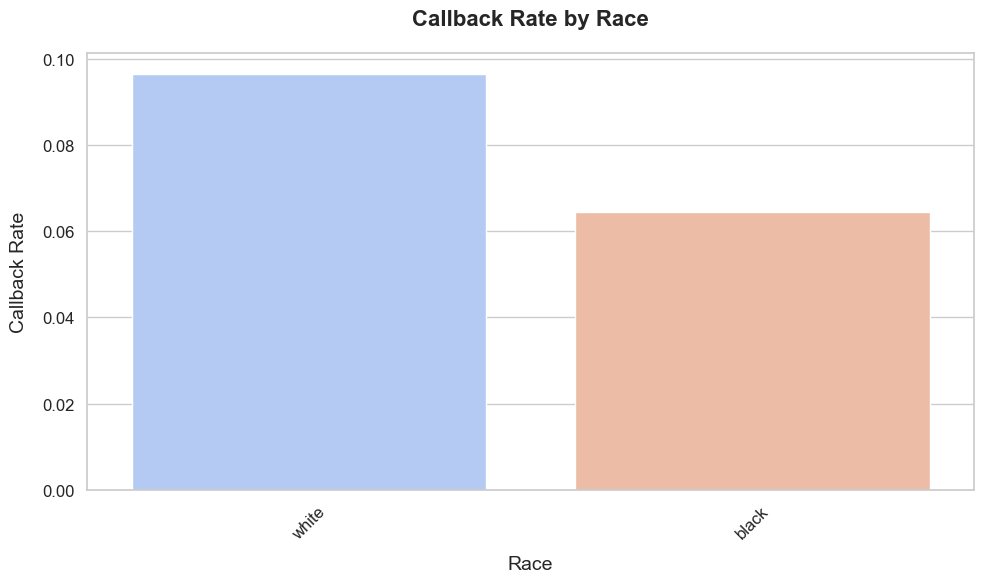

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


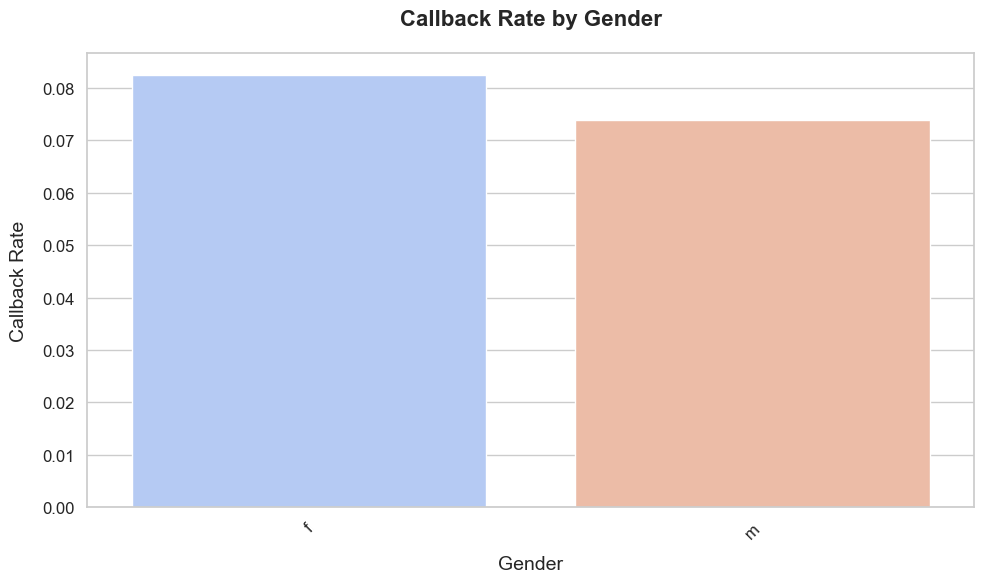

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


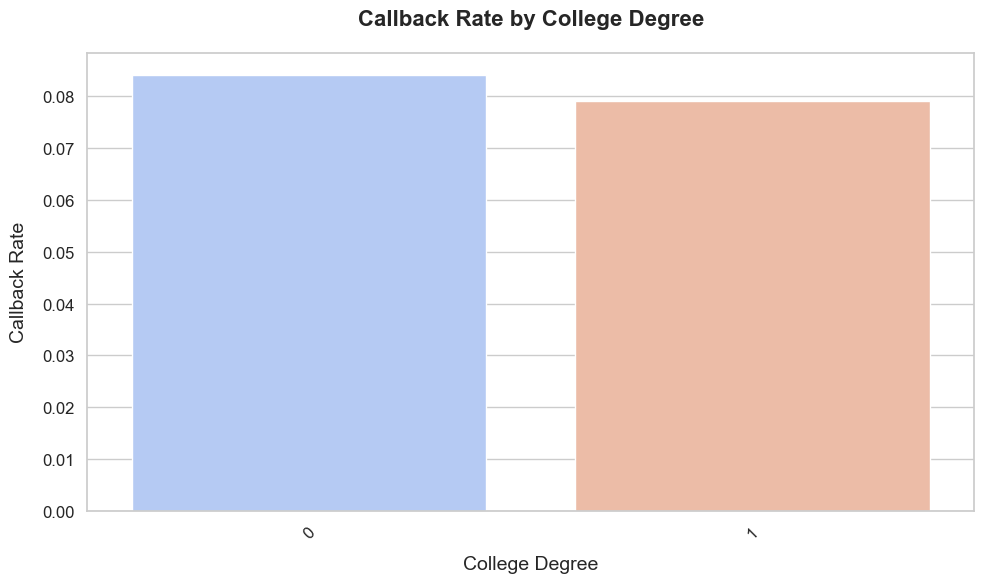

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


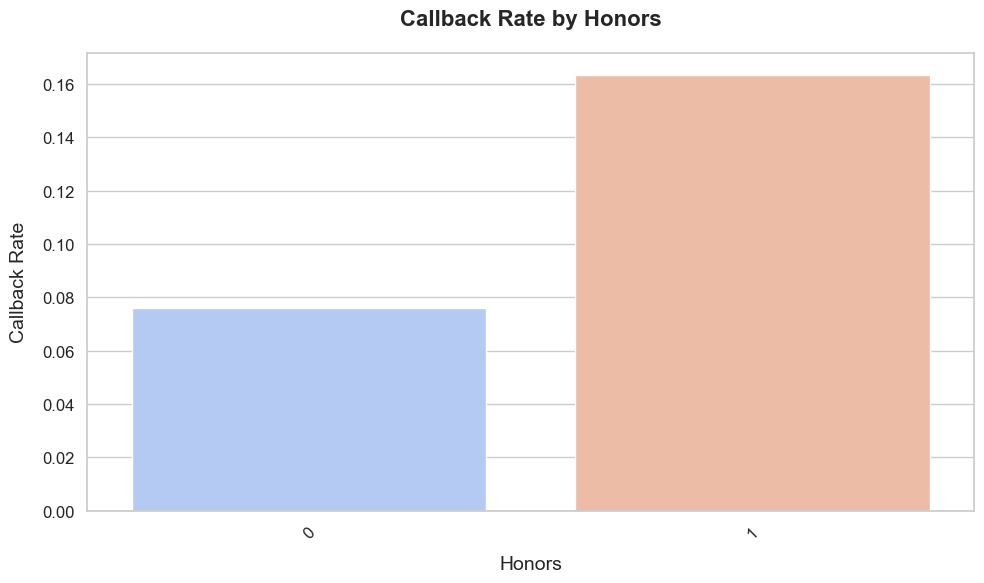

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


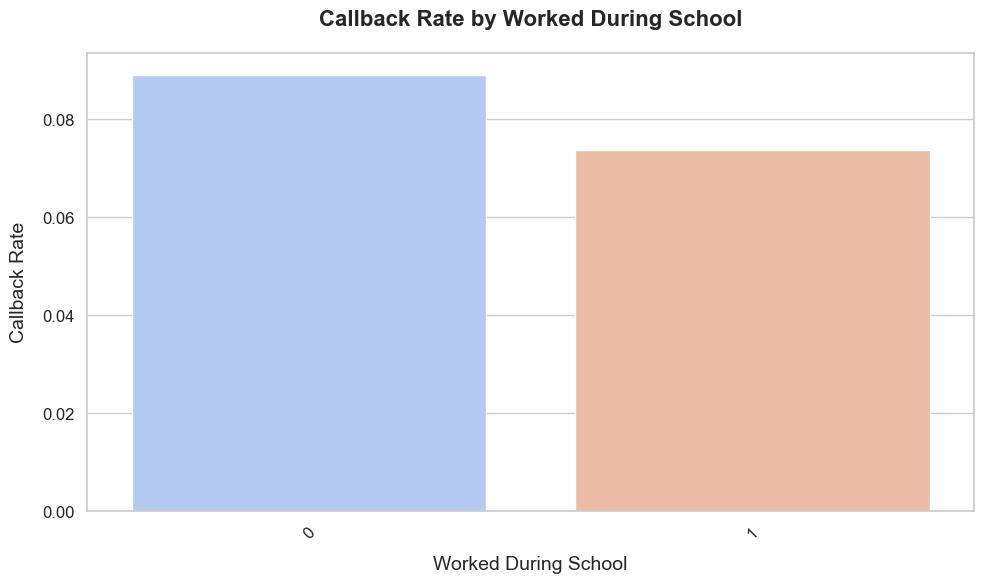

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


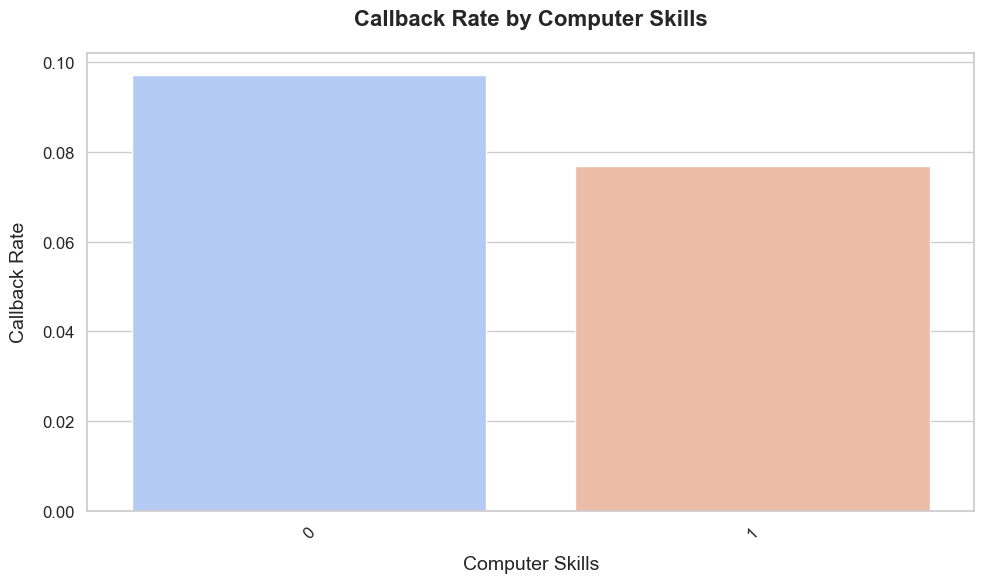

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


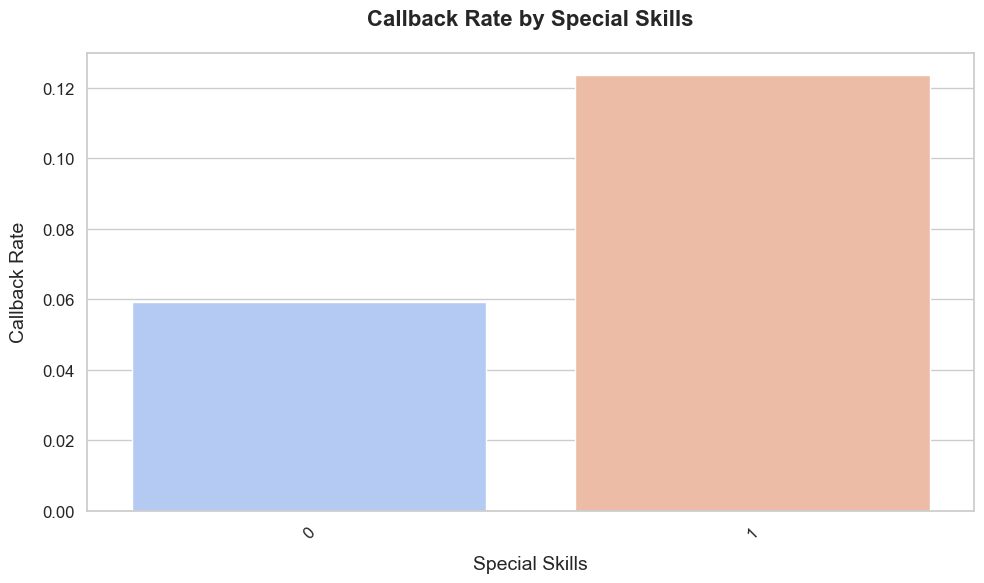

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


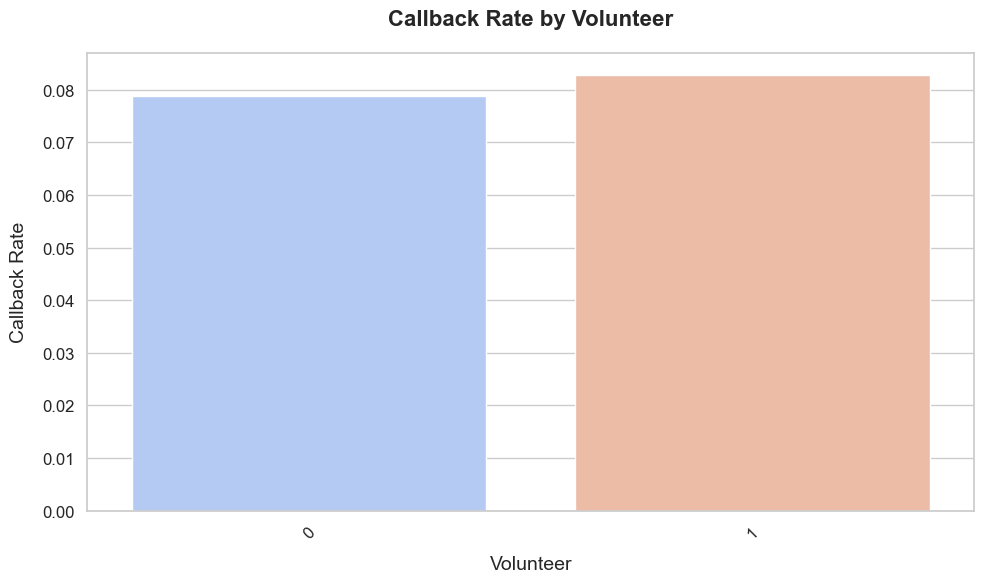

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


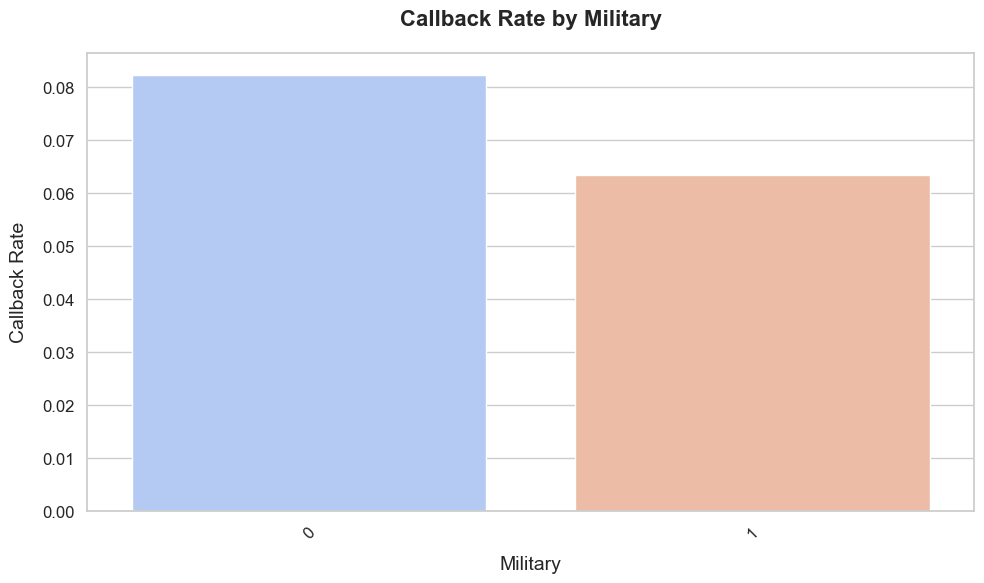

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


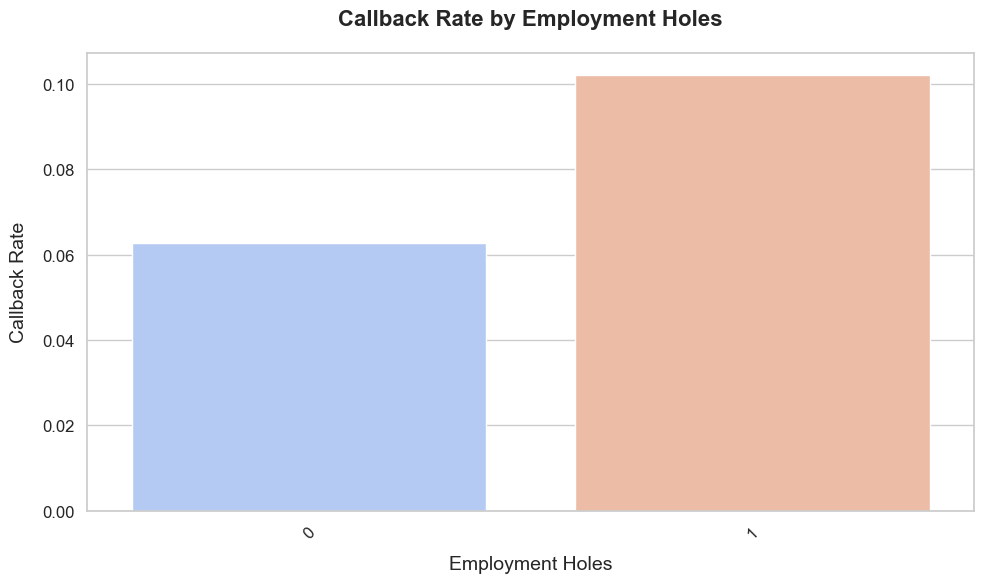

/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')
/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_36327/1823601790.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')


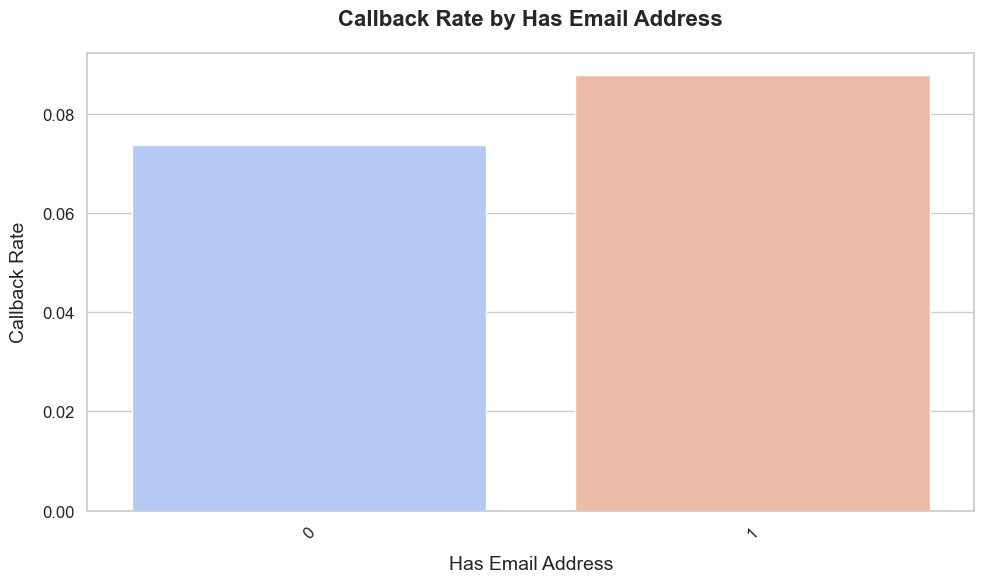

In [16]:
# List of categorical features (excluding the target 'received_callback')
categorical_features = ['job_city', 'job_industry', 'job_type', 'job_fed_contractor', 'job_equal_opp_employer', 
                        'job_ownership', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 
                        'job_req_organization', 'race', 'gender', 'college_degree', 'honors', 'worked_during_school', 
                        'computer_skills', 'special_skills', 'volunteer', 'military', 'employment_holes', 'has_email_address']

# Loop through each categorical feature and create a bar plot for callback rate
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    # Create a bar plot for each categorical feature vs callback rate
    sns.barplot(x=feature, y='received_callback', data=df, ci=None, palette='coolwarm')

    # Customize the plot
    plt.title(f'Callback Rate by {feature.replace("_", " ").title()}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(f'{feature.replace("_", " ").title()}', fontsize=14, labelpad=10)
    plt.ylabel('Callback Rate', fontsize=14, labelpad=10)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()

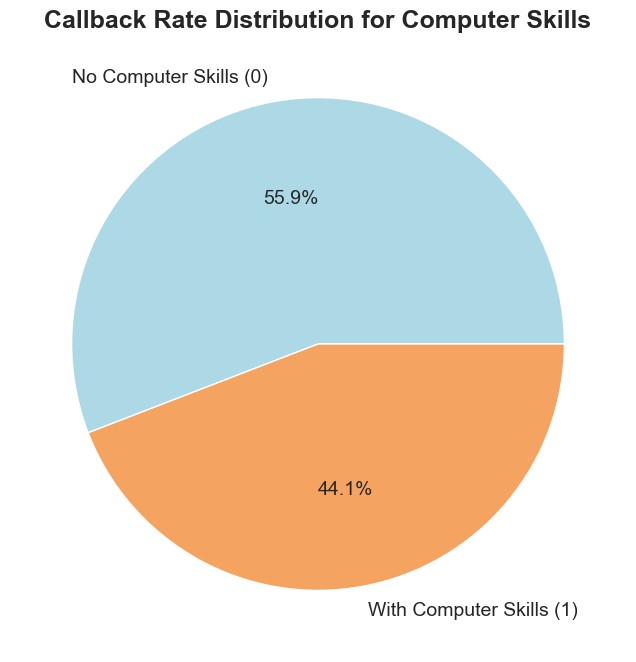

In [17]:

# Pie chart for callback rates by computer skills with legend
def pie_chart_plot(feature, df):
    callback_counts = df.groupby(feature)['received_callback'].mean()
    labels = ['No Computer Skills (0)', 'With Computer Skills (1)']
    
    # Create pie chart
    callback_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', colors=['#ADD8E6', '#F4A460'], figsize=(8, 8), textprops={'fontsize': 14})
    
    # Title and subtitle
    plt.title(f'Callback Rate Distribution for {feature.replace("_", " ").title()}', fontsize=18, fontweight='bold')
    plt.ylabel('')  # Remove default y-label

    plt.show()

# Call the function
pie_chart_plot('computer_skills', df)



In [18]:
from sklearn.model_selection import train_test_split

# Get unique values for all columns
unique_values_all_columns = {col: df[col].unique() for col in df.columns}
for col, unique_values in unique_values_all_columns.items():
    print(f"Unique values in column {col}: {unique_values}")


Unique values in column job_ad_id: [ 384  385  386 ...  381 1344  382]
Unique values in column job_city: ['Chicago' 'Boston']
Unique values in column job_industry: ['manufacturing' 'other_service' 'wholesale_and_retail_trade'
 'business_and_personal_service' 'finance_insurance_real_estate'
 'transportation_communication']
Unique values in column job_type: ['supervisor' 'secretary' 'sales_rep' 'retail_sales' 'manager' 'clerical']
Unique values in column job_fed_contractor: [nan  0.  1.]
Unique values in column job_equal_opp_employer: [1 0]
Unique values in column job_ownership: ['unknown' 'nonprofit' 'private' 'public']
Unique values in column job_req_any: [1 0]
Unique values in column job_req_communication: [0 1]
Unique values in column job_req_education: [0 1]
Unique values in column job_req_min_experience: ['5' 'some' nan '3' '2' '1' '8' '7' '0.5' '10' '0' '4' '6']
Unique values in column job_req_computer: [1 0]
Unique values in column job_req_organization: [0 1]
Unique values in col

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


y = df['received_callback']
X = df.drop(['received_callback', 'firstname','job_ad_id'], axis=1)

random_state = 42

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = ['job_req_min_experience','job_req_school','years_college','years_experience','resume_quality'] 
ordinal_job_req_min = ['unknown','0','0.5','1','2','3','4','5','some','6','7','8','10']
ordinal_job_req_school = ['none_listed','high_school_grad','some_college','college']
ordinal_years_college = [0,1,2,3,4]
ordinal_years_experience = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 44]
ordinal_resume_quality = ['low','high']

onehot_ftrs = ['job_city','job_industry','job_type','job_fed_contractor','job_equal_opp_employer','job_ownership','job_req_any',\
               'job_req_communication','job_req_education','job_req_computer','job_req_organization','race','gender','college_degree','honors',\
                'worked_during_school','computer_skills','special_skills','volunteer','military','employment_holes','has_email_address']

imputer = SimpleImputer(strategy='constant', fill_value='unknown')

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('impute_ord', Pipeline(steps=[
            ('imputer', imputer),  # First impute
            ('ordinal', OrdinalEncoder(categories=[ordinal_job_req_min, ordinal_job_req_school, ordinal_years_college, 
                                                   ordinal_years_experience, ordinal_resume_quality]))
        ]), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

ordinal_feature_names = ordinal_ftrs
onehot_feature_names = clf.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(onehot_ftrs)
all_feature_names = list(ordinal_feature_names) + list(onehot_feature_names)
X_train_prep_df = pd.DataFrame(X_train_prep, columns=all_feature_names)

print(X_train.shape)
print(X_train_prep.shape)

print(X_train_prep_df.head())


(2922, 27)
(2922, 60)
   job_req_min_experience  job_req_school  years_college  years_experience  \
0                     0.0             0.0            2.0               3.0   
1                     0.0             0.0            4.0               6.0   
2                     0.0             0.0            4.0               6.0   
3                     0.0             0.0            4.0              10.0   
4                     0.0             0.0            4.0               6.0   

   resume_quality  job_city_Boston  job_city_Chicago  \
0             0.0              0.0               1.0   
1             1.0              0.0               1.0   
2             0.0              1.0               0.0   
3             1.0              0.0               1.0   
4             0.0              1.0               0.0   

   job_industry_business_and_personal_service  \
0                                         0.0   
1                                         1.0   
2                        

In [7]:
# stratified and K Fold splitting 

from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv("resume.csv")

# assign X and y
y = df['received_callback']
X = df.drop(['received_callback', 'firstname','job_ad_id'], axis=1)

# set random state
random_state = 42

# split test set to use at the end
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

ordinal_ftrs = ['job_req_min_experience','job_req_school','years_college','years_experience','resume_quality'] 
ordinal_job_req_min = ['unknown','0','0.5','1','2','3','4','5','some','6','7','8','10']
ordinal_job_req_school = ['none_listed','high_school_grad','some_college','college']
ordinal_years_college = [0,1,2,3,4]
ordinal_years_experience = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 44]
ordinal_resume_quality = ['low','high']

onehot_ftrs = ['job_city','job_industry','job_type','job_fed_contractor','job_equal_opp_employer','job_ownership','job_req_any',\
               'job_req_communication','job_req_education','job_req_computer','job_req_organization','race','gender','college_degree','honors',\
                'worked_during_school','computer_skills','special_skills','volunteer','military','employment_holes','has_email_address']

imputer = SimpleImputer(strategy='constant', fill_value='unknown')

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('impute_ord', Pipeline(steps=[
            ('imputer', imputer),  # First impute
            ('ordinal', OrdinalEncoder(categories=[ordinal_job_req_min, ordinal_job_req_school, ordinal_years_college, 
                                                   ordinal_years_experience, ordinal_resume_quality]))
        ]), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

ordinal_feature_names = ordinal_ftrs
onehot_feature_names = clf.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(onehot_ftrs)
all_feature_names = list(ordinal_feature_names) + list(onehot_feature_names)
X_train_prep_df = pd.DataFrame(X_train_prep, columns=all_feature_names)

print()
print("X_train shape:", X_train.shape)
print("X_train after preprocessing:", X_train_prep.shape)

print()
print(X_train_prep_df.head())


test balance: (array([0, 1]), array([896,  78]))
new fold
(array([0, 1]), array([2687,  235]))
(array([0, 1]), array([895,  79]))
new fold
(array([0, 1]), array([2687,  235]))
(array([0, 1]), array([895,  79]))
new fold
(array([0, 1]), array([2686,  236]))
(array([0, 1]), array([896,  78]))
new fold
(array([0, 1]), array([2686,  236]))
(array([0, 1]), array([896,  78]))

X_train shape: (2922, 27)
X_train after preprocessing: (2922, 60)

   job_req_min_experience  job_req_school  years_college  years_experience  \
0                     4.0             0.0            4.0               7.0   
1                     8.0             0.0            4.0               6.0   
2                     4.0             0.0            3.0               5.0   
3                     0.0             0.0            4.0               4.0   
4                     0.0             3.0            4.0              13.0   

   resume_quality  job_city_Boston  job_city_Chicago  \
0             1.0              0.0

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, make_scorer
import pickle
from pprint import pprint
import shap
from IPython.core.display import display

# function for the ML pipeline as outlined above 
def MLpipe_KFold_Accuracy(X, y, ML_algo, param_grid):
    
    # lists to be returned 
    test_scores = []
    best_models = []

    # -----------------------Preprocessing---------------------------#
    # preprocessor
    ordinal_ftrs = ['job_req_min_experience','job_req_school','years_college','years_experience','resume_quality'] 
    ordinal_job_req_min = ['unknown','0','0.5','1','2','3','4','5','some','6','7','8','10']
    ordinal_job_req_school = ['none_listed','high_school_grad','some_college','college']
    ordinal_years_college = [0,1,2,3,4]
    ordinal_years_experience = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 44]
    ordinal_resume_quality = ['low','high']

    onehot_ftrs = ['job_city','job_industry','job_type','job_fed_contractor','job_equal_opp_employer','job_ownership','job_req_any',\
                'job_req_communication','job_req_education','job_req_computer','job_req_organization','race','gender','college_degree','honors',\
                    'worked_during_school','computer_skills','special_skills','volunteer','military','employment_holes','has_email_address']

    imputer = SimpleImputer(strategy='constant', fill_value='unknown')

    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('impute_ord', Pipeline(steps=[
                ('imputer', imputer),  # First impute
                ('ordinal', OrdinalEncoder(categories=[ordinal_job_req_min, ordinal_job_req_school, ordinal_years_college, 
                                                    ordinal_years_experience, ordinal_resume_quality]))
            ]), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs)
        ])

    nr_runs = 10
    ftr_names = X.columns
    scores = np.zeros((len(ftr_names), nr_runs))

    #--------------------------------Initialize Grid Search CV---------------------------------#
    # 10 loops
    for random_state in range(1,11):

        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state*42)

        pipe = make_pipeline(preprocessor,ML_algo)
        
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)

        grid = GridSearchCV(pipe, param_grid=param_grid, scoring = make_scorer(f1_score),
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        
        grid.fit(X_other, y_other)
        
        y_test_pred = grid.predict(X_test)
        test_score = f1_score(y_test, y_test_pred)

        test_scores.append(test_score)
        best_models.append(grid.best_estimator_)
    
    #----------------------------------Permutation Importance----------------------------------#
        # Permutation Importance
        for i in range(len(ftr_names)):
            #print('shuffling ' + str(ftr_names[i]))
            acc_scores = []
            for j in range(nr_runs):
                # Shuffle the feature
                X_test_shuffled = X_test.copy()
                X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
                # Calculate and store the F1 score
                preprocessor = grid.best_estimator_.named_steps['columntransformer']
                X_test_shuffled_transformed = preprocessor.transform(X_test_shuffled)
                
                # Predict using the model, which expects preprocessed data
                model = grid.best_estimator_.named_steps[ML_algo.__class__.__name__.lower()]
                y_pred_shuffled = model.predict(X_test_shuffled_transformed)
                
                # Calculate F1 score for the shuffled data
                acc_scores.append(f1_score(y_test, y_pred_shuffled))
            # Store mean accuracy score for this run
            scores[i, random_state - 1] = np.mean(acc_scores)
        

    print(f"Mean Test F1 score: {np.mean(test_scores)}")
    print(f"Standard Deviation of Test F1 score: {np.std(test_scores)}")

    # Plotting Permutation Importance
    sorted_indices = np.argsort(np.mean(scores, axis=1))[::-1]

    plt.rcParams.update({'font.size': 11})
    plt.figure(figsize=(8, 12))
    plt.boxplot(scores[sorted_indices].T, vert=False, labels=np.array(ftr_names)[sorted_indices])
    plt.axvline(np.mean(test_scores), color='red', linestyle='--', label='Test Score')
    plt.title(f"Permutation Importances ({ML_algo.__class__.__name__})")
    plt.xlabel("F1 Score with Permuted Feature")
    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()

    #------------------------------------Shap----------------------------------#
    shap.initjs()

    preprocessor = grid.best_estimator_.named_steps['columntransformer']
    processed_feature_names = preprocessor.get_feature_names_out()
    
    explainer_cls = {
        'LogisticRegression': shap.LinearExplainer,
        'RandomForestClassifier': shap.TreeExplainer,
        'SVC': shap.KernelExplainer,
        'XGBClassifier': shap.TreeExplainer
    }.get(ML_algo.__class__.__name__, shap.KernelExplainer)

    X_test_prep = grid.best_estimator_.named_steps['columntransformer'].transform(X_test)
    explainer = explainer_cls(grid.best_estimator_.named_steps[ML_algo.__class__.__name__.lower()], X_test_prep)

    # Compute SHAP values
    shap_values = explainer.shap_values(X_test_prep)

    # Plot summary with corrected feature names
    shap.summary_plot(shap_values, features=X_test_prep, feature_names=processed_feature_names)
    
    mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

    # Sort features by importance
    sorted_indices = np.argsort(mean_abs_shap_values)[::-1]
    sorted_feature_names = np.array(processed_feature_names)[sorted_indices]
    sorted_shap_values = mean_abs_shap_values[sorted_indices]

    # Limit to top 20 features (optional)
    top_n = 20
    sorted_feature_names = sorted_feature_names[:top_n]
    sorted_shap_values = sorted_shap_values[:top_n]

    # Enhanced plot
    plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
    colors = plt.cm.Blues(np.linspace(0.4, 1, len(sorted_shap_values)))

    bars = plt.barh(
        sorted_feature_names, sorted_shap_values, color=colors, edgecolor="black", height=0.8
    )

    # Add data labels for each bar
    for bar, value in zip(bars, sorted_shap_values):
        plt.text(
            value + 0.005,  # X position
            bar.get_y() + bar.get_height() / 2,  # Y position
            f"{value:.2f}",  # Value to display
            va="center", fontsize=10
        )

    # Customize the plot
    plt.title("SHAP Feature Importance (Top 20 Features)", fontsize=16, weight="bold")
    plt.xlabel("Mean |SHAP Value| (Average Impact on Model Output)", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.gca().invert_yaxis()  # Invert Y-axis for descending importance
    plt.tight_layout()

    # Show the plot
    plt.show()

    plot_index = [1, 525, 777]  # Index of the sample to explain

    # Directly use explainer.expected_value as it is scalar
    expected_value = explainer.expected_value

    # Debugging: Check the shape of SHAP values
    print("SHAP values shape:", shap_values.shape)

    # Generate the force plot
    for idx in plot_index:
        model_name = ML_algo.__class__.__name__
        force_plot = shap.force_plot(
            expected_value,  # Directly use it as a scalar
            shap_values[idx, :],  # Use only index and features (binary classification)
            features=X_test_prep[idx, :],
            feature_names=processed_feature_names
        )
        display(force_plot)
        file_name = f"shap_force_plot_{model_name}_index_{idx}.html"
        shap.save_html(file_name, force_plot)
        print(f"Force plot for model {model_name} and index {idx} saved as {file_name}")

    #--------------------------------Save Model----------------------------------#
    algo_name = ML_algo.__class__.__name__
    save_path = f"{algo_name}_models.pkl"
    with open(save_path, "wb") as f:
        pickle.dump(best_models, f)
    print(f"All models saved successfully to {save_path}!")

    return test_scores, best_models


/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_58979/2327564166.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [43]:
# read data
df = pd.read_csv("resume.csv")

# assign X and y
y = df['received_callback']
X = df.drop(['received_callback', 'firstname','job_ad_id'], axis=1)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Mean Test F1 score: 0.0
Standard Deviation of Test F1 score: 0.0


/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_58979/2327564166.py:107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[sorted_indices].T, vert=False, labels=np.array(ftr_names)[sorted_indices])


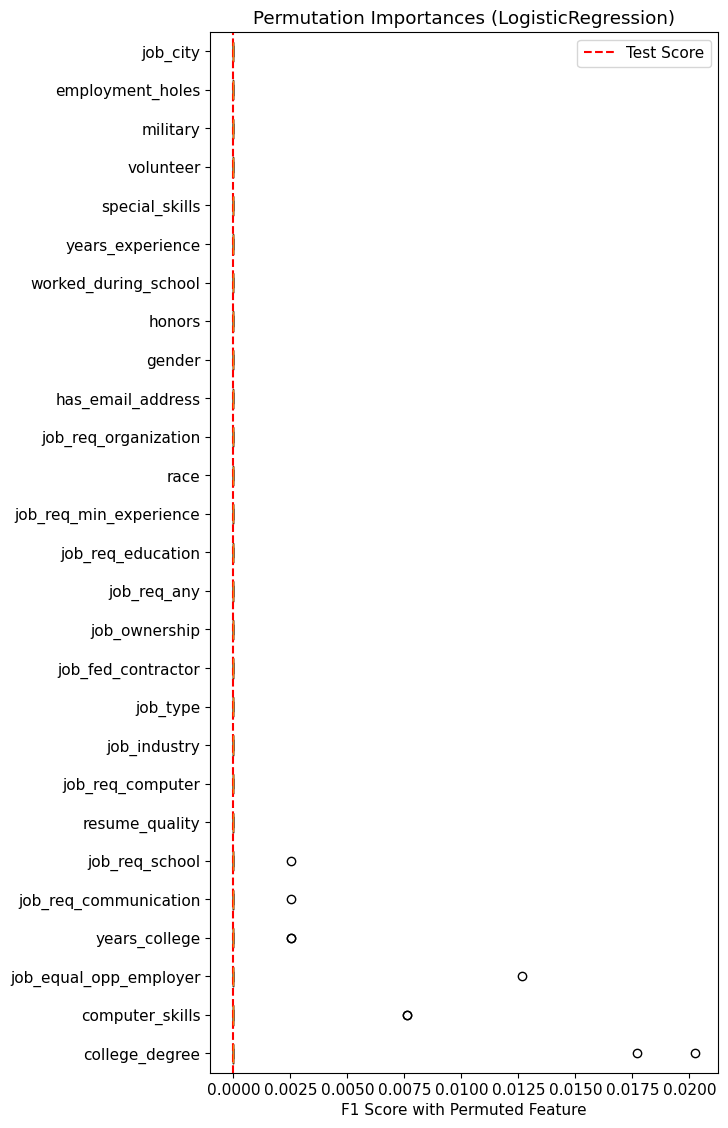

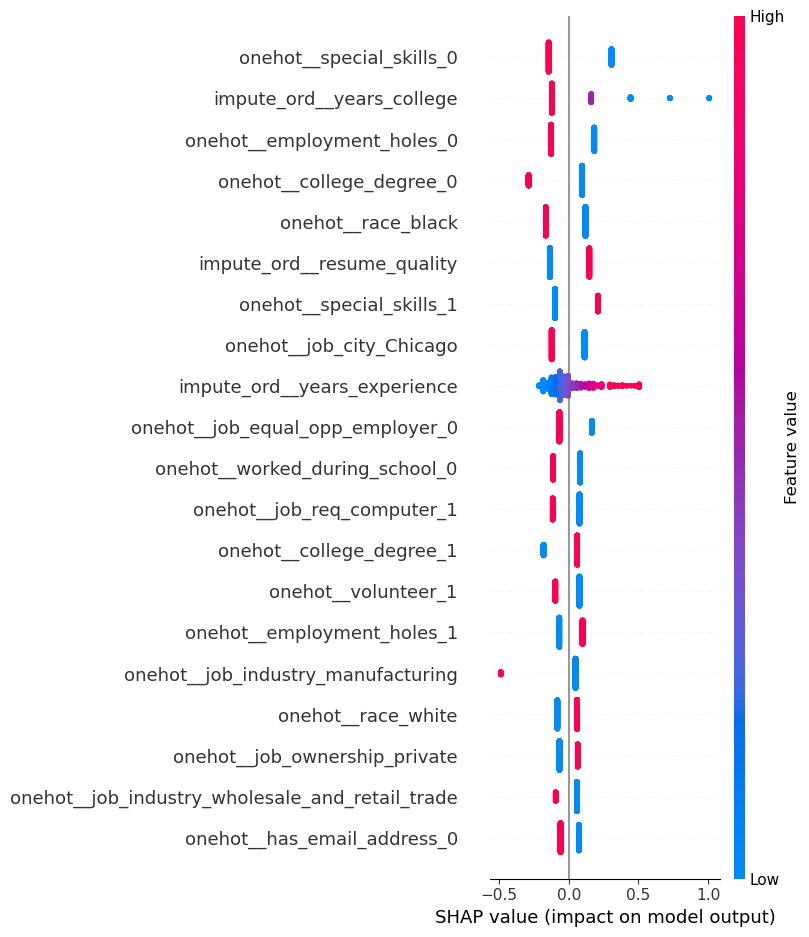

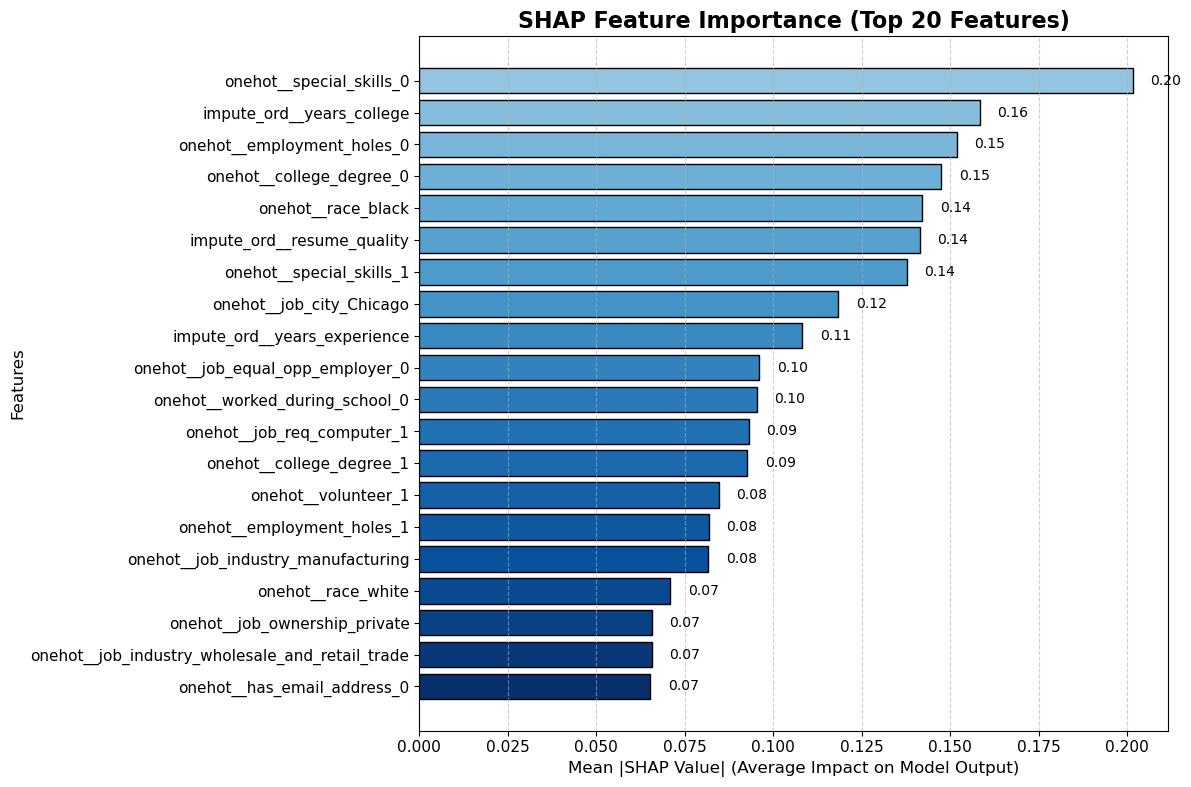

SHAP values shape: (974, 60)


Force plot for model LogisticRegression and index 1 saved as shap_force_plot_LogisticRegression_index_1.html


Force plot for model LogisticRegression and index 525 saved as shap_force_plot_LogisticRegression_index_525.html


Force plot for model LogisticRegression and index 777 saved as shap_force_plot_LogisticRegression_index_777.html
All models saved successfully to LogisticRegression_models.pkl!


([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('impute_ord',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(fill_value='unknown',
                                                                                   strategy='constant')),
                                                                    ('ordinal',
                                                                     OrdinalEncoder(categories=[['unknown',
                                                                                                 '0',
                                                                                                 '0.5',
                                                                                                 '1',
                                                      

In [99]:
# Testing Local
param_grid_lr = {'logisticregression__C': [0.5], 'logisticregression__penalty': ['l2'], 'logisticregression__solver': ['saga']}
log_reg = LogisticRegression(max_iter=5000)
MLpipe_KFold_Accuracy(X, y, ML_algo=log_reg, param_grid=param_grid_lr)

In [69]:
from sklearn.metrics import f1_score
from collections import Counter
import numpy as np

counter = Counter(y)
minority_class = counter.most_common()[-1][0]

# Create predictions where all instances are predicted as the minority class
y_baseline_pred = np.full_like(y, minority_class)

# Calculate the baseline F1 score
baseline_f1 = f1_score(y, y_baseline_pred, zero_division=0)

print(f"Baseline F1 score: {baseline_f1}")

Baseline F1 score: 0.14899277841125047


----------------Logistic Regression-----------------
Fitting 4 folds for each of 40 candidates, totalling 160 fits


Fitting 4 folds for each of 40 candidates, totalling 160 fits
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Mean Test F1 score: 0.2072125621220818
Standard Deviation of Test F1 score: 0.01415839160376696


/var/folders/z3/bw7f0jc54372c3jpx59322cw0000gn/T/ipykernel_58979/2263373984.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[sorted_indices].T, vert=False, labels=np.array(ftr_names)[sorted_indices])


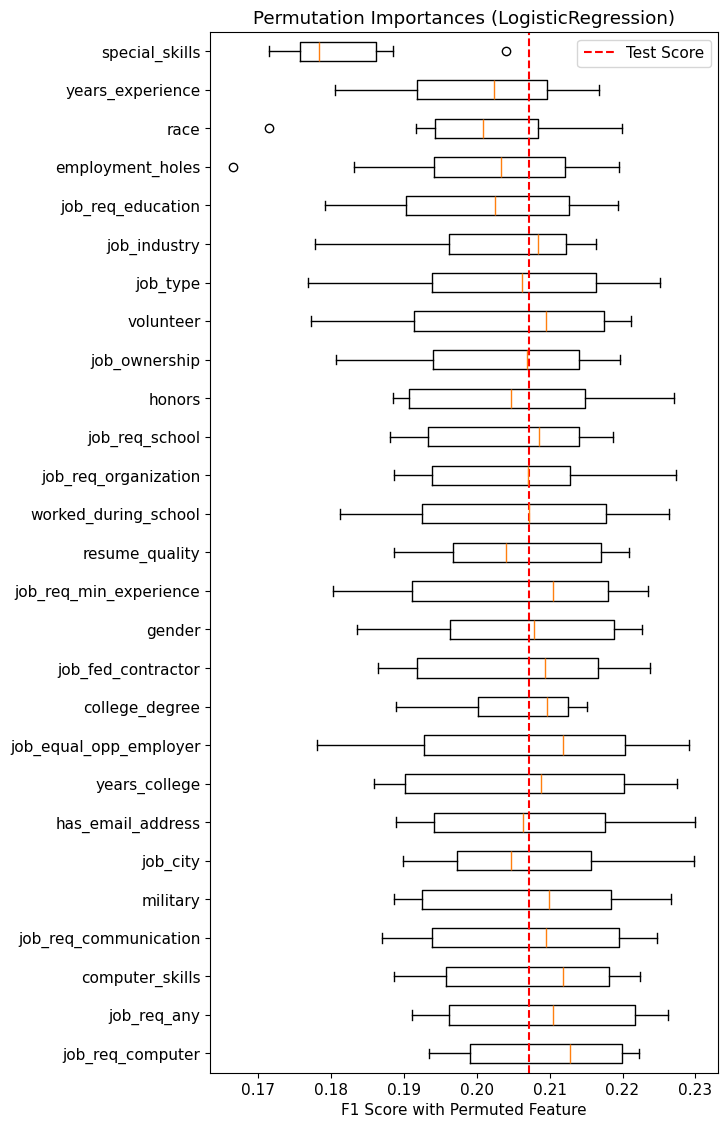

All models saved successfully to LogisticRegression_models.pkl!
([0.21445221445221446,
  0.20454545454545456,
  0.19047619047619047,
  0.22121896162528218,
  0.18876404494382024,
  0.1891891891891892,
  0.2302771855010661,
  0.21962616822429906,
  0.19913419913419914,
  0.21444201312910285],
 [Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('impute_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               '0',
                                  

In [64]:
# logistic
print("----------------Logistic Regression-----------------")
param_grid_lr = {'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                 'logisticregression__penalty': ['l2', 'l1'],
                 'logisticregression__class_weight': ['balanced', None],
                 'logisticregression__solver': ['saga'],
                 'logisticregression__tol': [1e-3, 1e-4]}
log_reg = LogisticRegression(max_iter=10000, )
log_model = MLpipe_KFold_Accuracy(X, y, ML_algo=log_reg, param_grid=param_grid_lr)
pprint(log_model)

In [4]:
param_grid_svc = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'svc__degree': [2, 3, 4],  # Only used for 'poly' kernel
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svc__class_weight': ['balanced', None]  # Adjust weights for class imbalance
}

# Initialize the SVC classifier
svc_clf = SVC(probability=True, random_state=42)

# Run the pipeline with SVC
print("----------------SVC-----------------")
svc_model = MLpipe_KFold_Accuracy(X, y, ML_algo=svc_clf, param_grid=param_grid_svc)
pprint(svc_model)

----------------SVC-----------------
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Fitting 4 folds for each of 192 candidates, totalling 768 fits
Mean Test F1 score: 0.2091286634237382
Standard Deviation of Test F1 score: 0.04570976663387385
All models saved successfully to SVC_models.pkl!
([0.15019762845849802,
  0.2230769230769231,
  0.22,
  0.28846153846153844,
  0.18681318681318682,
  0.2641509433962264,
  0.21084337349397592,
  0.21739130434782608,
  0.12422360248447205

In [ ]:
# random forest classifier
print("-------------Random Forest--------------")
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200, 500],
    'randomforestclassifier__max_depth': [1, 5, 10, 30, 50],
    'randomforestclassifier__max_samples': [0.5, 0.75, 1.0],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__class_weight': [None, 'balanced']
    }
rfc_model = MLpipe_KFold_Accuracy(X, y, ML_algo=rf_clf, param_grid=param_grid)
pprint(rfc_model)

-------------Random Forest--------------
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Mean Test F1 score: 0.22357091077894387
Standard Deviation of Test F1 score: 0.020022565939952944
All models saved successfully to RandomForestClassifier_models.pkl!
([0.22895622895622897, 0.21176470588235294, 0.20359281437125748, 0.254071661237785, 0.18374558303886926, 0.23076923076923078, 0.2356902356902357, 0.24913

In [ ]:
# KNN
# No class_weight
print("-----------------KNN------------------")
knn_clf = KNeighborsClassifier()
param_grid = {'kneighborsclassifier__n_neighbors': [1,5,10,50],
              'kneighborsclassifier__weights': ['uniform', 'distance'],
              'kneighborsclassifier__metric': ['minkowski', 'euclidean', 'manhattan'],
              'kneighborsclassifier__p': [1, 2],  # Only relevant for minkowski metric
              'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'kneighborsclassifier__leaf_size': [10, 20, 30, 40]}
print(MLpipe_KFold_Accuracy(X, y, ML_algo=knn_clf, param_grid=param_grid))

-----------------KNN------------------
Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 768 candidates, totalling 3072 fits
Mean Test Accuracy: 0.9197125256673511
Standard Deviation of Test Accuracy: 0.00041067761806981015
([0.919917864476386, 0.919917864476386, 0.919917864476386, 0.919917864476386, 0.919917864476386, 0.9188911704312115, 0.919917864476386, 0.919917864476386, 0.9188911704312115, 0.919917864476386], [Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('impute_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                      

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
from xgboost import XGBClassifier
from collections import Counter

counter = Counter(y)
n_negative = counter[0]
n_positive = counter[1]

scale_pos_weight = n_negative / n_positive
print("Suggested scale_pos_weight:", scale_pos_weight)
# Should I use y_train or y to find the scale_pos_weight?

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'xgbclassifier__n_estimators': [50, 100, 200],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
    'xgbclassifier__max_depth': [3, 5, 10],
    'xgbclassifier__colsample_bytree': [0.75, 0.9, 1],
    'xgbclassifier__subsample': [0.75, 0.9, 1],
    'xgbclassifier__min_child_weight': [1, 3, 5, 10],
    'xgbclassifier__reg_alpha': [0, 0.01, 0.1, 1],
    'xgbclassifier__reg_lambda': [1, 1.5, 2],
    'xgbclassifier__scale_pos_weight': [scale_pos_weight * 0.5, scale_pos_weight, scale_pos_weight * 1.5]
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(eval_metric='auc', random_state=42, n_jobs=-1)

# Run the pipeline with XGBoost
print("----------------XGBoost-----------------")
xgb_model = MLpipe_KFold_Accuracy(X, y, ML_algo=xgb_clf, param_grid=param_grid_xgb)
print(xgb_model)


Suggested scale_pos_weight: 11.423469387755102
----------------XGBoost-----------------
Fitting 4 folds for each of 34992 candidates, totalling 139968 fits


Fitting 4 folds for each of 34992 candidates, totalling 139968 fits
Fitting 4 folds for each of 34992 candidates, totalling 139968 fits
Fitting 4 folds for each of 34992 candidates, totalling 139968 fits
Fitting 4 folds for each of 34992 candidates, totalling 139968 fits
Fitting 4 folds for each of 34992 candidates, totalling 139968 fits
Fitting 4 folds for each of 34992 candidates, totalling 139968 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 34992 candidates, totalling 139968 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 34992 candidates, totalling 139968 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 4 folds for each of 34992 candidates, totalling 139968 fits
Mean Test F1 score: 0.23183111449637805
Standard Deviation of Test F1 score: 0.037247112715841586


FileNotFoundError: [Errno 2] No such file or directory: ''

[Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('impute_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               '0',
                                                                                               '0.5',
                                                                                               '1',
                                                                                               '2',
                          

### Interpretability -- Global

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# Define transformers
ordinal_ftrs = ['job_req_min_experience', 'job_req_school', 'years_college', 'years_experience', 'resume_quality']
ordinal_job_req_min = ['unknown', '0', '0.5', '1', '2', '3', '4', '5', 'some', '6', '7', '8', '10']
ordinal_job_req_school = ['none_listed', 'high_school_grad', 'some_college', 'college']
ordinal_years_college = [0, 1, 2, 3, 4]
ordinal_years_experience = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 44
]
ordinal_resume_quality = ['low', 'high']

onehot_ftrs = [
    'job_city', 'job_industry', 'job_type', 'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
    'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 'job_req_organization',
    'race', 'gender', 'college_degree', 'honors', 'worked_during_school', 'computer_skills', 'special_skills',
    'volunteer', 'military', 'employment_holes', 'has_email_address'
]

imputer = SimpleImputer(strategy='constant', fill_value='unknown')

preprocessor = ColumnTransformer(
    transformers=[
        ('impute_ord', Pipeline(steps=[
            ('imputer', imputer),
            ('ordinal', OrdinalEncoder(categories=[
                ordinal_job_req_min, ordinal_job_req_school, ordinal_years_college,
                ordinal_years_experience, ordinal_resume_quality
            ]))
        ]), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs)
    ]
)

# Recreate test set and preprocess it manually
test_size = 0.2
np.random.seed(42)

for model_idx, random_state in enumerate(range(1, 11)):
    print(f"Evaluating Model {model_idx + 1}...")

    # Split the dataset
    _, X_test, _, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state * 42
    )

    # Fit the preprocessor on the training data (assuming it was done before)
    preprocessor.fit(X)  # Fit on the entire dataset to simulate pre-trained preprocessors

    # Preprocess the test set
    X_test_prep = preprocessor.transform(X_test)

    # Compute original test F1 score
    model = models[model_idx]
    original_test_score = f1_score(y_test, model.predict(X_test_prep))

    # Initialize scores
    nr_runs = 10
    scores = np.zeros((len(ordinal_ftrs) + len(onehot_ftrs), nr_runs))

    # Permutation importance
    for i, feature in enumerate(X.columns):
        shuffled_scores = []
        for _ in range(nr_runs):
            X_test_shuffled = X_test.copy()
            X_test_shuffled[feature] = np.random.permutation(X_test[feature])
            X_test_shuffled_prep = preprocessor.transform(X_test_shuffled)
            shuffled_score = f1_score(y_test, model.predict(X_test_shuffled_prep))
            shuffled_scores.append(shuffled_score)
        scores[i, :] = shuffled_scores

# Average the scores
mean_scores = np.mean(scores, axis=1)
std_scores = np.std(scores, axis=1)

# Sort features by mean importance
sorted_indices = np.argsort(mean_scores)[::-1]
sorted_features = np.array(X.columns)[sorted_indices]

# Plot the permutation importance
plt.figure(figsize=(8, 10))
plt.boxplot(scores[sorted_indices].T, vert=False, labels=sorted_features)
plt.axvline(original_test_score, color='red', linestyle='--', label='Original F1 Score')
plt.title("Permutation Importances (Averaged Across Models)")
plt.xlabel("F1 Score with Permuted Feature")
plt.legend()
plt.tight_layout()
plt.show()


Evaluating Model 1...


ValueError: X has 60 features, but ColumnTransformer is expecting 27 features as input.